## Exploration for Claim 1: ##
    Higher square footage increases home sale price

In [1]:
#import all the things
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols

In [3]:
#read master.csv file into pandas dataframe
master= pd.read_csv('../data/master.csv')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (105,111) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# How many records in the dataframe?
records = master.shape[0]
records

62039

In [5]:
# Any duplicate entries?
master.duplicated().sum()

0

In [6]:
master.isnull().sum()

id                      0
ExciseTaxNbr            0
DocumentDate            0
SalePrice               0
RecordingNbr            0
                    ...  
Obsolescence        18201
PcntNetCondition    18201
Condition           18201
AddnlCost           18201
footprint           18201
Length: 151, dtype: int64

In [7]:
#set SalePrice as index

cols = list(master.columns)
cols = [cols[3]] + cols[:3] + cols[4:]
master = master[cols]

In [20]:
#remove non-reisdential property types based on LookUp file information
#(see reference folder)
master_res = master[master.PropertyType.isin([11,12,13,14])]
master_res.head()

,SalePrice,id,ExciseTaxNbr,DocumentDate,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,...,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,footprint
2,485500,1000042,3018323,10/29/2019,20191031001228,,,,,,...,0.0,0.0,2016.0,0.0,0.0,0.0,0.0,3.0,0.0,0.238254
7,0,1000067,3006715,03/18/2019,20190823001565,,,,,,...,0.0,1.0,1946.0,0.0,0.0,0.0,0.0,4.0,0.0,0.128736
8,358308,1000067,2979287,03/18/2019,20190327000321,,,,,,...,0.0,1.0,1946.0,0.0,0.0,0.0,0.0,4.0,0.0,0.128736
10,0,1000087,3025591,12/10/2019,20191216000012,,,,,,...,0.0,0.0,1977.0,0.0,0.0,0.0,0.0,4.0,0.0,0.186820
11,850000,1200008,2991776,05/17/2019,20190604001211,,,,,,...,0.0,1.0,1964.0,0.0,0.0,0.0,0.0,4.0,0.0,0.072488


In [22]:
# How many records in the master_res dataframe?
records = master_res.shape[0]
records

31228

In [24]:
#remove all sales with price < 0
df_sale = master_res[master_res.SalePrice > 0]
df_sale.head()

,SalePrice,id,ExciseTaxNbr,DocumentDate,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,...,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,footprint
2,485500,1000042,3018323,10/29/2019,20191031001228,,,,,,...,0.0,0.0,2016.0,0.0,0.0,0.0,0.0,3.0,0.0,0.238254
8,358308,1000067,2979287,03/18/2019,20190327000321,,,,,,...,0.0,1.0,1946.0,0.0,0.0,0.0,0.0,4.0,0.0,0.128736
11,850000,1200008,2991776,05/17/2019,20190604001211,,,,,,...,0.0,1.0,1964.0,0.0,0.0,0.0,0.0,4.0,0.0,0.072488
22,465000,2000015,3022128,11/19/2019,20191122001296,,,,,,...,0.0,1.0,1961.0,0.0,0.0,0.0,0.0,5.0,0.0,0.086336
30,525000,3000060,3025153,12/06/2019,20191212001113,,,,,,...,0.0,0.0,1903.0,0.0,0.0,0.0,0.0,4.0,0.0,0.107041


In [23]:
# How many records in the df_sale dataframe?
records = df_sale.shape[0]
records

21795

In [14]:
#FSM for sale price and total square footage
fsm_df = df_sale[['SalePrice', 'SqFtTotLiving']]

In [15]:
fsm_df.dropna(inplace=True)
fsm_df.head();

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
formula = 'SalePrice~SqFtTotLiving'
fsm = ols(formula=formula, data=fsm_df).fit()

In [18]:
#OLS Regression Results
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                 1.191e+04
Date:                Mon, 15 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:35:58   Log-Likelihood:            -2.7525e+05
No. Observations:               19033   AIC:                         5.505e+05
Df Residuals:                   19031   BIC:                         5.505e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.144e+04   8126.611     -1.408      0.159   -2.74e+04    4485.665
SqFtTotLiving   377.0499      3.455    109.137      0.000     370.278     383.822
==============================================================================
Omnibus:                    24410.132   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12524644.100
Skew:                           6.712   Prob(JB):                         0.00
Kurtosis:                     127.952   Cond. No.                     5.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


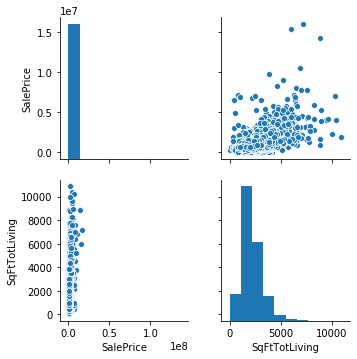

In [19]:
sns.pairplot(data= df_sale[['SalePrice', 'SqFtTotLiving']]);

In [38]:
# rsquared, and params.
# save those values to the variables below.

rsquared = fsm.rsquared
params = fsm.params

print(f'Rsquared of FSM: {rsquared}')
print('----------')
print('Beta values of FSM:')
print(params)

Rsquared of FSM: 0.3849417963343311
----------
Beta values of FSM:
Intercept       -11443.214296
SqFtTotLiving      377.049879
dtype: float64


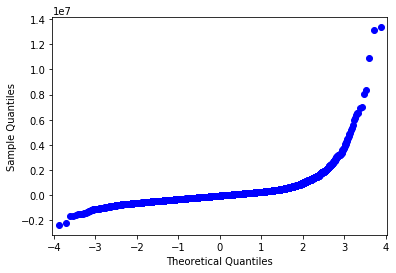

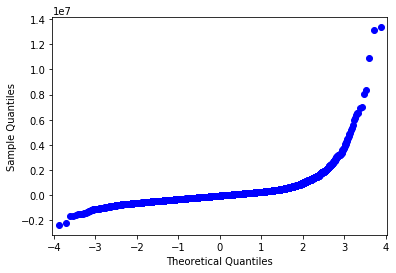

In [39]:
#QQ plot
fsm_resids = fsm.resid

import statsmodels.api as sm
sm.qqplot(fsm_resids)

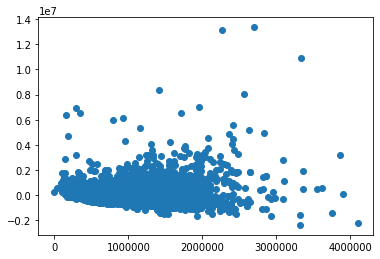

In [41]:
#Homoscadasticity test
y_hat = fsm.predict()

fig, ax = plt.subplots()

ax.scatter(y_hat, fsm_resids)

In [42]:
from sklearn.linear_model import LinearRegression

# fit an sklearn model
#instantiate a linear regression object 
lr = LinearRegression()

# split the data into target and features
y = fsm_df.SalePrice
X = fsm_df.drop('SalePrice', axis=1)

# Call .fit from the linear regression object, and feed X and y in as parameters
lr.fit(X,y)

# lr has a method called score.  Again, feed in X and y, and read the output. Save it in the variable score.  What is that number?  Compare it to statsmodels. 
score = lr.score(X,y)
# that is the r_2.  It is the same as the Statsmodels R_2

# lr also has attributes coef_ and intercept_. Save and compare to statsmodels
beta = lr.coef_
intercept = lr.intercept_
#sklearn calculates the same coeficients and intercepts as statmodels.

In [44]:
# Create another dataframe containing our three features of interest
model_2_df = df_sale[['SalePrice', 'SqFtTotLiving',]].copy()

# Drop na's across all columns
model_2_df.dropna(inplace=True)

# save the R-like formula into the variable
formula = 'SalePrice~SqFtTotLiving'

# train the model like we did above
model_2 = ols(formula=formula, data=model_2_df).fit()

# print out the summary
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                 1.191e+04
Date:                Mon, 15 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:12:21   Log-Likelihood:            -2.7525e+05
No. Observations:               19033   AIC:                         5.505e+05
Df Residuals:                   19031   BIC:                         5.505e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.144e+04   8126.611     -1.408      0.159   -2.74e+04    4485.665
SqFtTotLiving   377.0499      3.455    109.137      0.000     370.278     383.822
==============================================================================
Omnibus:                    24410.132   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12524644.100
Skew:                           6.712   Prob(JB):                         0.00
Kurtosis:                     127.952   Cond. No.                     5.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""